In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load dataset
df = pd.read_csv('solar_energy_usage_india.csv')
df.head(10)  # Display first 10 rows

,Date,Day of Week,State,Holiday,Energy Generated (kWh),Energy Consumed (kWh),Surplus Energy (kWh),Battery Storage (kWh)
0,2024-01-01,Monday,Karnataka,Yes,28.38,20.69,7.69,4.25
1,2024-01-02,Tuesday,Telangana,No,25.72,11.71,14.01,3.38
2,2024-01-03,Wednesday,Madhya Pradesh,No,28.48,12.15,16.33,6.35
3,2024-01-04,Thursday,Maharashtra,No,14.95,21.70,-6.75,9.77
4,2024-01-05,Friday,Tamil Nadu,No,14.96,14.53,0.43,4.30
5,2024-01-06,Saturday,Maharashtra,Yes,12.43,NaN,NaN,1.32
6,2024-01-07,Sunday,Maharashtra,Yes,12.37,5.01,7.36,6.32
7,2024-01-08,Monday,Andhra Pradesh,No,21.68,19.93,1.75,5.54
8,2024-01-09,Tuesday,Rajasthan,No,NaN,14.66,NaN,8.05
9,2024-01-10,Wednesday,Karnataka,No,24.22,13.25,10.97,3.82


In [50]:
# Data info and summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    500 non-null    object 
 1   Day of Week             500 non-null    object 
 2   State                   500 non-null    object 
 3   Holiday                 500 non-null    object 
 4   Energy Generated (kWh)  445 non-null    float64
 5   Energy Consumed (kWh)   467 non-null    float64
 6   Surplus Energy (kWh)    421 non-null    float64
 7   Battery Storage (kWh)   460 non-null    float64
dtypes: float64(4), object(4)
memory usage: 31.4+ KB


In [51]:
df.describe()

,Energy Generated (kWh),Energy Consumed (kWh),Surplus Energy (kWh),Battery Storage (kWh)
count,445.000000,467.000000,421.000000,460.000000
mean,19.311393,15.175589,3.961948,5.049870
std,5.798567,5.769794,8.073514,2.916117
min,10.050000,5.000000,-14.720000,0.010000
25%,14.160000,10.385000,-1.900000,2.412500
50%,18.820000,15.040000,3.990000,5.165000
75%,24.400000,19.915000,9.850000,7.507500
max,29.980000,25.000000,22.540000,10.000000


In [52]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Day of Week,0
State,0
Holiday,0
Energy Generated (kWh),55
Energy Consumed (kWh),33
Surplus Energy (kWh),79
Battery Storage (kWh),40


In [53]:
# Handle missing values by filling with mean (for numeric columns) and mode (for categorical columns)
df.fillna({
    "Energy Generated (kWh)": df["Energy Generated (kWh)"].mean(),
    "Energy Consumed (kWh)": df["Energy Consumed (kWh)"].mean(),
    "Surplus Energy (kWh)": df["Surplus Energy (kWh)"].mean(),
    "Battery Storage (kWh)": df["Battery Storage (kWh)"].mean()
}, inplace=True)

In [54]:
# Convert 'N/A' to NaN and then fill missing values
df.replace("N/A", np.nan, inplace=True)
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [55]:
# Drop Date column (not needed for model)
df.drop(columns=["Date"], inplace=True)

In [56]:
df.head()

,Day of Week,State,Holiday,Energy Generated (kWh),Energy Consumed (kWh),Surplus Energy (kWh),Battery Storage (kWh)
0,Monday,Karnataka,Yes,28.38,20.69,7.69,4.25
1,Tuesday,Telangana,No,25.72,11.71,14.01,3.38
2,Wednesday,Madhya Pradesh,No,28.48,12.15,16.33,6.35
3,Thursday,Maharashtra,No,14.95,21.70,-6.75,9.77
4,Friday,Tamil Nadu,No,14.96,14.53,0.43,4.30


In [57]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [58]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ["Day of Week", "State", "Holiday"]:
    df[col] = label_encoder.fit_transform(df[col])

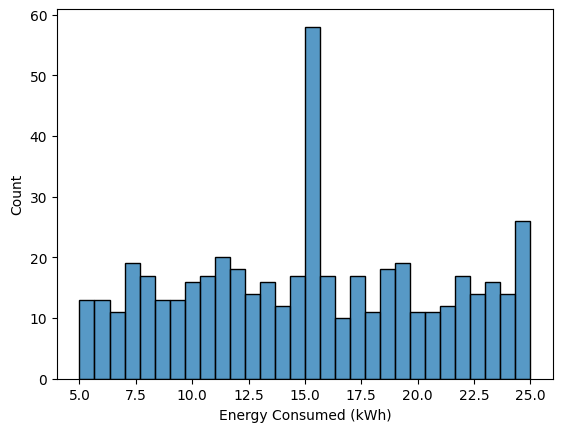

In [59]:
# Visualize distribution of energy consumption
sns.histplot(df["Energy Consumed (kWh)"], bins=30)
plt.show()

In [60]:
# Define features and target variable
X = df.drop(columns=["Energy Consumed (kWh)"])  # Features
y = df["Energy Consumed (kWh)"]  # Target

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 1.2355384786051387
Mean Squared Error: 6.056913465002753
R-squared Score: 0.8067032823768294


In [71]:
df.head()

,Day of Week,State,Holiday,Energy Generated (kWh),Energy Consumed (kWh),Surplus Energy (kWh),Battery Storage (kWh)
0,1,2,1,28.38,20.69,7.69,4.25
1,5,7,0,25.72,11.71,14.01,3.38
2,6,3,0,28.48,12.15,16.33,6.35
3,4,4,0,14.95,21.70,-6.75,9.77
4,0,6,0,14.96,14.53,0.43,4.30


In [72]:
model.predict([[5,	3,	1,	28,	15.69,	3.25]])

array([40.19064572])